In [1]:
# import matplotlib as mpl
# matplotlib.style.use('fast')
# matplotlib.use('agg')
import logging

logging.basicConfig(level=logging.WARNING)
# logging.basicConfig(level=logging.DEBUG)
import shnitsel as st

## Basic datasheet test

In [2]:
from shnitsel.data.shnitsel_db.db_compound_group import CompoundInfo
from shnitsel.data.shnitsel_db_format import ShnitselDB
from shnitsel.data.trajectory_format import Trajectory


def set_charges(traj: Trajectory):
    return traj.assign(
        state_charges=(
            'state',
            traj.state_charges.values * 0 + 0,
            traj.state_charges.attrs,
        )
    )


shnitsel_db_single_nx: Trajectory = st.io.read(
    'test_data/newtonx/test_I01_v2.6/', parallel=False
)  # type: ignore
# shnitsel_db_single_nx: ShnitselDB = st.io.read(
#     'test_data/playground/TRAJECTORIES/', parallel=True
# )  # type: ignore


# shnitsel_db_single_nx = set_charges(shnitsel_db_single_nx)

# # shnitsel_db_full_newtonx = shnitsel_db_full_newtonx.map_over_trajectories(set_charges)  # type: ignore
# shnitsel_db_full_newtonx = shnitsel_db_full.map_over_trajectories(set_charges)
# shnitsel_db_single_nx
# shnitsel_db_single_nx.isel(time=0,state=3).forces

  0%|          | 0/5 [00:00<?, ?it/s]

Rendering coupling page for 7 states with at least 21 relevant state transitions.


100%|██████████| 21/21 [00:00<00:00, 3256.81it/s]


dict_keys(['energy', 'forces', 'dip_perm'])
Saving datasheet as pdf. Please be patient, this may take some time.


Written: 100%|██████████| 1/1 [00:02<00:00,  2.46s/page]

Writing pdf with 3 pages


{'/unknown/aggregate of subtree(unknown)': [<Figure size 827x974.167 with 13 Axes>,
  <Figure size 350x350 with 49 Axes>,
  <Figure size 827x1169 with 7 Axes>]}

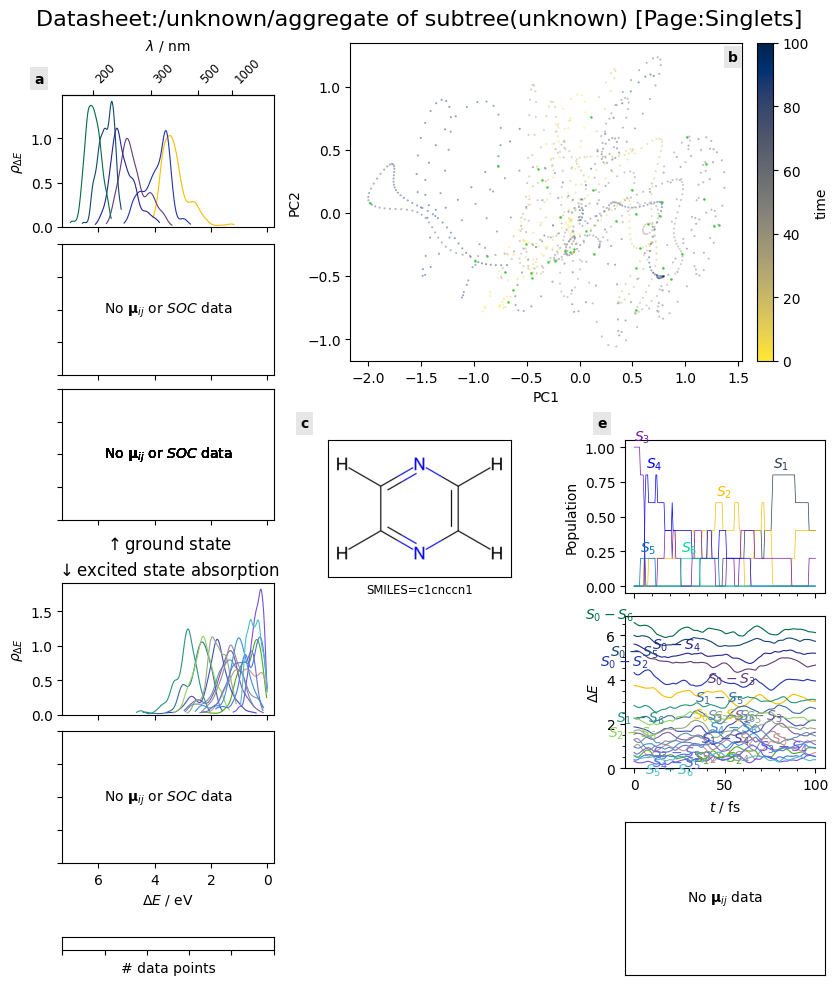

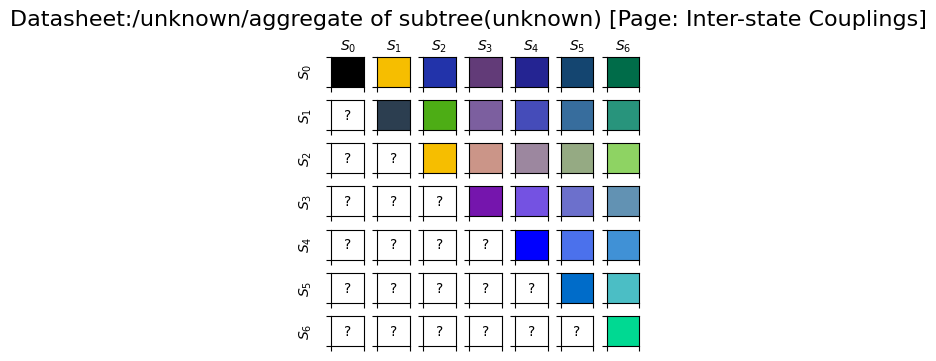

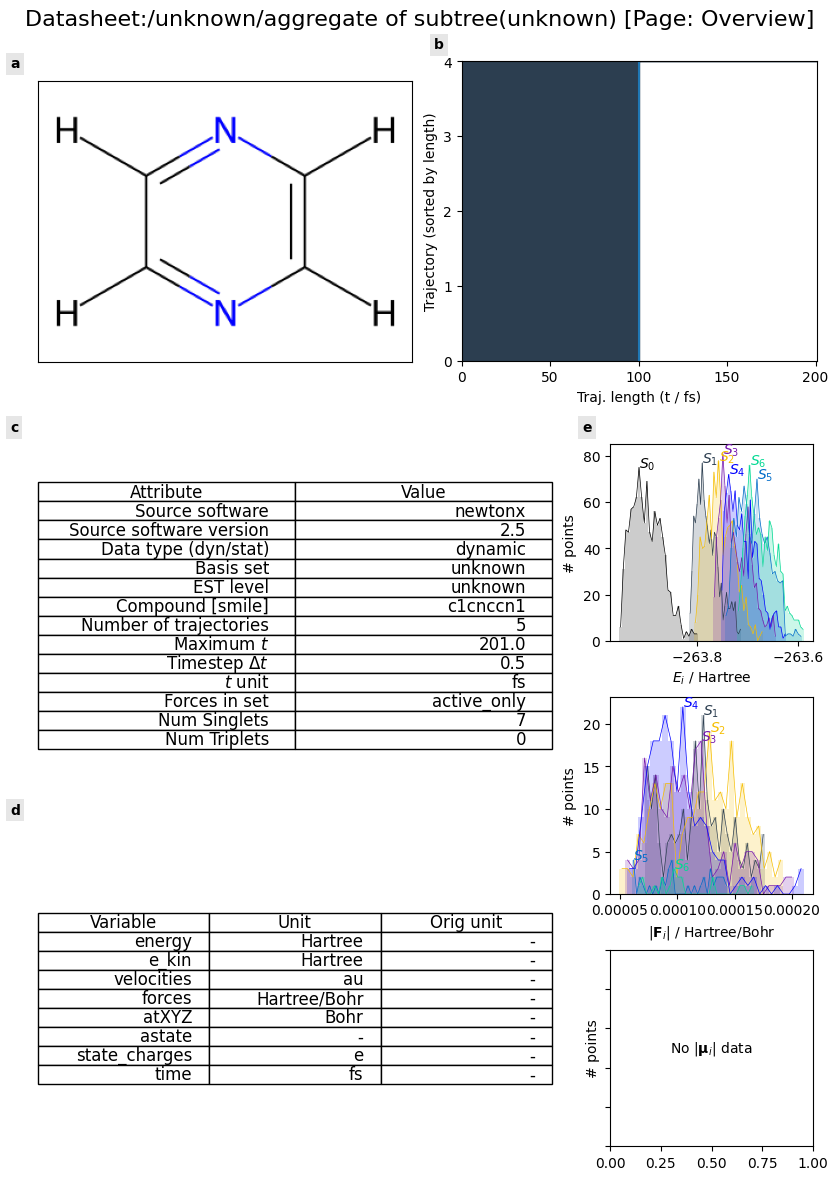

In [3]:
from shnitsel.vis.datasheet import Datasheet

sheet = Datasheet(shnitsel_db_single_nx)
# shnitsel_db_triplet
# sheet.datasheet_pages['root'].charge = 1
# sheet.plot(include_pca_page=True, path="./triplet_sharc.pdf")
sheet.plot(include_meta_page=True, path="./triplet_newtonx_.pdf")
# sheet.datasheet_pages

In [4]:
%time sheet.calc_all()

CPU times: total: 0 ns
Wall time: 0 ns


In [5]:
%time sheet.plot_per_state_histograms()

CPU times: total: 0 ns
Wall time: 0 ns


AttributeError: 'Datasheet' object has no attribute 'plot_per_state_histograms'

In [ ]:
%time sheet.plot_timeplots()

In [ ]:
%time sheet.plot_separated_spectra_and_hists()

In [ ]:
%time fig = sheet.plot()

In [ ]:
# fig.savefig('/tmp/ethene.png')

## Alkene datasheets

In [ ]:
from glob import iglob

for path in iglob('/nc/Theo_SHNITSEL/filtered/*.nc'):
    print(path)

    sheet = sh.plot.Datasheet(path=path)
    sheet.plot()

## Methylenimmonium

In [ ]:
sheet = sh.plot.Datasheet(path='/nc/Theo_SHNITSEL/unfiltered/CH2NH2_time.nc')
sheet.charge = 1
sheet.plot()

## Save all datasheets

In [ ]:
import os

os.mkdir('/tmp/datasheets')
os.chdir('/nc/SHNITSEL_databases/dynamic/')
paths = dict(
    I01='I01_ch2nh2_dynamic.nc',
    A01='A01_ethene_dynamic.nc',
    A02='A02_propene_dynamic.nc',
    A03='A03_butene_dynamic.nc',
    R01a='R01a_chd50_dynamic.nc',
    R01b='R01b_chd25_dynamic.nc',
)
for ref, path in paths.items():
    sheet = sh.plot.Datasheet(path=path)
    fig = sheet.plot()
    fig.set_dpi(400)
    fig.savefig(f'/tmp/datasheets/{ref}.pdf')
    fig.savefig(f'/tmp/datasheets/{ref}.png')